In [1]:
%matplotlib inline
from pylab import *

import detectorgeometry as geom
reload(geom)

import detectorgeometry_trap as geom_trap
reload(geom_trap)

<module 'detectorgeometry_trap' from 'detectorgeometry_trap.pyc'>

In [3]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 10000000 # number of samples
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=90 # divisions indeclination used to generate plot

areas1=[]
areas2=[]
for j in range(0,steps):
    print j
    theta = radians(start+(end-start)*float(j)/steps)
    
    area1 = geom.Area(theta,h,R,theta_view, N)
    A1 = area1.degree_eff_area()
    
    area2 = geom_trap.Area(theta,h,R,theta_view, N)
    A2, phi_e, theta_e, view_angle, exit_angle, norm, e_dot= area2.event_retention()
    areas1.append(A1)
    areas2.append(A2)
    print j,A1,A2


0


detectorgeometry_trap.py:102: RuntimeWarning: divide by zero encountered in divide
  self.ret_phi_e = np.arctan(self.ret_e_y / self.ret_e_x)
detectorgeometry_trap.py:102: RuntimeWarning: invalid value encountered in divide
  self.ret_phi_e = np.arctan(self.ret_e_y / self.ret_e_x)


0 0.8437343416942542 0.0
1
1 1.404107948259371 0.05361546243654569
2
2 1.5464846194748385 0.10724716151184881
3
3 0.8413889388591805 0.16091344943942384
4
4 1.6835866542720574 0.2146302890657949
5
5 0.5592281942869619 0.2684119338785086
6
6 1.8180071486427485 0.3222910555284637
7
7 1.3939648580426725 0.3762553835494114
8
8 1.1169315267791966 0.4303263400205166
9
9 2.222535030310111 0.48453382330749845
10
10 1.6606835983528876 0.5388109805842444
11
11 1.5195473513788098 0.5932489345484498
12
12 1.0937587507378888 0.6479249325651751
13
13 1.9209942218552163 0.7026973069896638
14
14 1.9079333126240778 0.7576433399954537
15
15 0.5444271501172674 0.8126009115408671
16
16 1.7472259600638342 0.867937284929876
17
17 1.7483463907989856 0.9233023466485888
18
18 1.9979891789149 0.9788889474615473
19
19 1.3275006936785756 1.0343378475411902
20
20 1.4512713652612612 1.089783942804776
21
21 1.1949307193339767 1.1455759684497717
22
22 2.0902782067748333 1.2009422572211303
23
23 1.5341222466597528 1.2

detectorgeometry_trap.py:21: RuntimeWarning: invalid value encountered in arcsin
  psi  = np.pi - np.arcsin((self.R+self.h) * np.sin(nadir) / self.R)


84 507.5826747660757 87.59235490026185
85
85 0.0 nan
86
86 0.0 nan
87
87 0.0 nan
88
88 0.0 nan
89
89 0.0 nan


[]

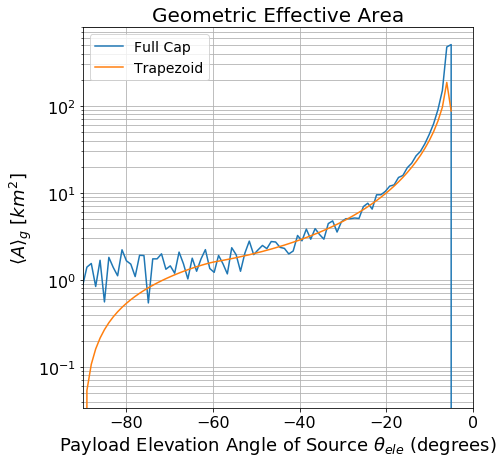

In [5]:
# Creating a plot for the full range of possible source declinations 
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
x = np.linspace(-end,-start,steps)

ax.plot(x, areas1)
ax.plot(x, areas2)
    
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-90,0)  
legend = ax.legend(["Full Cap", "Trapezoid"], fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle_g$'+" "+r'$[km^2]$', fontsize=18)
plt.title("Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()

0.03519504861725875 0.04793165416710954 0.7504915783575616 0.8203047484373349


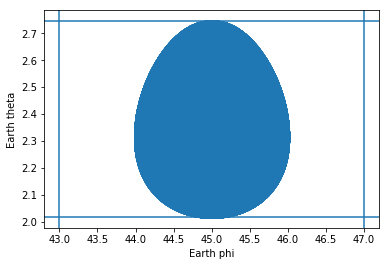

In [15]:
area = geom_trap.Area(radians(81),h,R,theta_view, N)
A, phi_e, theta_e, view_angle, exit_angle, norm, e_dot= area.event_retention()
earth_t_min, earth_t_max, phi_E_min, phi_E_max = area.earth_patch(area.t_src,area.phi_src, area.th_v)

print earth_t_min, earth_t_max, phi_E_min, phi_E_max
plt.scatter(degrees(phi_e), degrees(theta_e),s=1)
#plt.xlim(degrees(phi_E_min)-0.05,degrees(phi_E_max)+0.05)
#plt.ylim(degrees(earth_t_min)-0.05, degrees(earth_t_max)+0.05)
plt.xlabel("Earth phi")
plt.ylabel("Earth theta")
ax = plt.axes()
ax.axhline(degrees(earth_t_min))
ax.axhline(degrees(earth_t_max))
ax.axvline(degrees(phi_E_min))
ax.axvline(degrees(phi_E_max))
plt.show()